In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [5]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [6]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [7]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from linear_regression_gd import LinearRegressorGD

In [11]:
reg = LinearRegressorGD()

In [12]:
reg.fit(X_train, y_train)

In [13]:
reg.get_params()

{'intercept': np.float64(164.11665163935035),
 'coef': array([5634.41933573, -417.8691571 , 1138.20447577, -966.84348124,
          17.6229501 ,  337.17964476, 5730.38109516, 1042.66793982,
        1183.68780419])}

In [14]:
y_pred = reg.predict(X_test)

In [15]:
score = r2_score(y_pred, y_test)

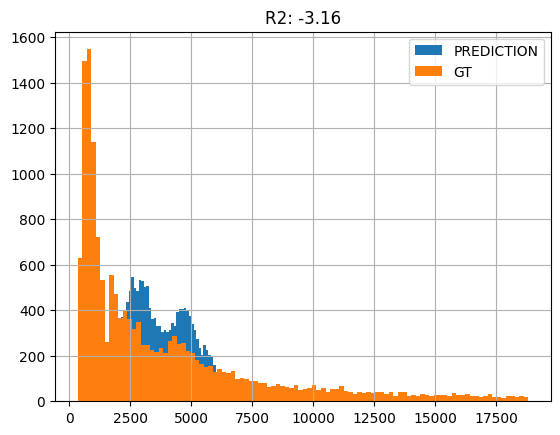

In [16]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [43]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [44]:
reg3 = LinearRegressorGD()
reg3.fit(X_train_scaled, y_train_scaled)

In [45]:
reg3.get_params()

{'intercept': np.float64(-1.50312057082953e-11),
 'coef': array([ 0.81013236,  0.03451995, -0.12986986,  0.21665809, -0.00684389,
        -0.01105129,  0.17406037,  0.02294722,  0.02584427])}

In [47]:
y_pred3_scaled = reg.predict(X_test_scaled)
y_pred3 = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

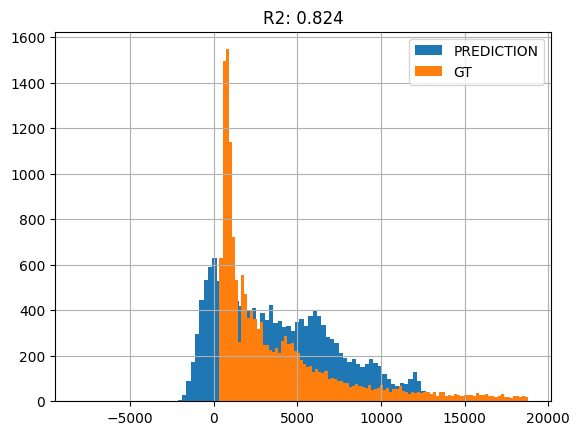

In [48]:
score3 = r2_score(y_pred3, y_test)
plt.title(f'R2: {str(score3)[:5]}')
plt.hist(y_pred3.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [25]:
from mlp_regressor import MLPRegressor

In [49]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,50), n_iter = 500)
mlp_reg.fit(X_train_scaled, y_train_scaled)

Iteration 100/500, Loss: 0.919131
Iteration 200/500, Loss: 0.810231
Iteration 300/500, Loss: 0.647961
Iteration 400/500, Loss: 0.449947
Iteration 500/500, Loss: 0.299917


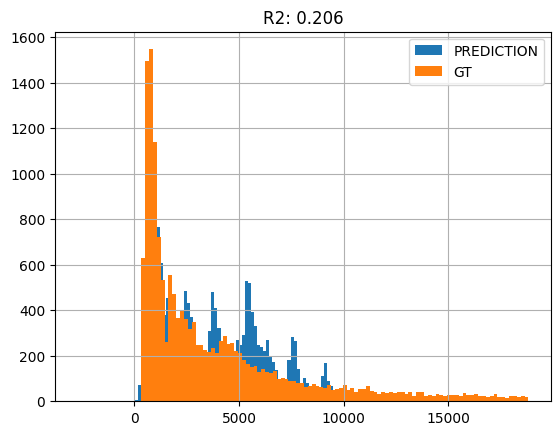

In [50]:
y_pred_scaled = mlp_reg.predict(X_test_scaled)
mlp_y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
mlp_score = r2_score(mlp_y_pred, y_test)
plt.title(f'R2: {str(mlp_score)[:5]}')
plt.hist(mlp_y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();